In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from jupyterthemes import jtplot
jtplot.style('onedork', context='poster', grid=0, ticks=1)
jtplot.figsize(aspect=1.25)

In [2]:
df = pd.read_csv('../realsci/tweet_activity_metrics_realscientists_20170401_20170701_en.csv')
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time', inplace=1)
df = df.reset_index(drop=1)
len(df)

3750

In [3]:
df.columns

Index(['Tweet id', 'Tweet permalink', 'Tweet text', 'time', 'impressions',
       'engagements', 'engagement rate', 'retweets', 'replies', 'likes',
       'user profile clicks', 'url clicks', 'hashtag clicks', 'detail expands',
       'permalink clicks', 'app opens', 'app installs', 'follows',
       'email tweet', 'dial phone', 'media views', 'media engagements',
       'promoted impressions', 'promoted engagements',
       'promoted engagement rate', 'promoted retweets', 'promoted replies',
       'promoted likes', 'promoted user profile clicks', 'promoted url clicks',
       'promoted hashtag clicks', 'promoted detail expands',
       'promoted permalink clicks', 'promoted app opens',
       'promoted app installs', 'promoted follows', 'promoted email tweet',
       'promoted dial phone', 'promoted media views',
       'promoted media engagements'],
      dtype='object')

In [7]:
df['follows_cumsum'] = df['follows'].cumsum()
df['retweets_cumsum'] = df['retweets'].cumsum()
df['likes_cumsum'] = df['likes'].cumsum()
df['media views_cumsum'] = df['media views'].cumsum()

C:\Users\nwan\AppData\Local\Continuum\Anaconda3_431\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


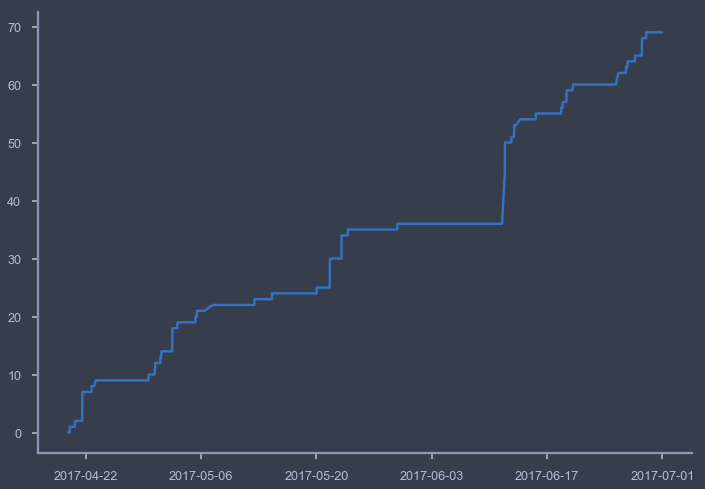

In [8]:
plt.plot(df['time'], df['follows_cumsum'])
sns.despine()
plt.show()

C:\Users\nwan\AppData\Local\Continuum\Anaconda3_431\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


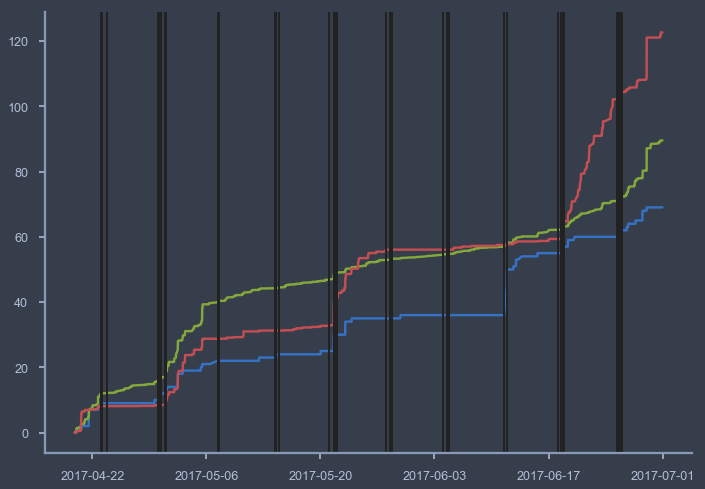

In [16]:
df['day'] = [datetime.weekday(df.iloc[x]['time']) for x in list(range(len(df)))]

plt.plot(df['time'], df['follows_cumsum'])
plt.plot(df['time'], df['retweets_cumsum']/100)
plt.plot(df['time'], df['media views_cumsum']/1000)
for line in df.loc[df['day'] == 6, 'time']:
    plt.axvline(x=line, color='k', linewidth=2)
sns.despine()
plt.show()

C:\Users\nwan\AppData\Local\Continuum\Anaconda3_431\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


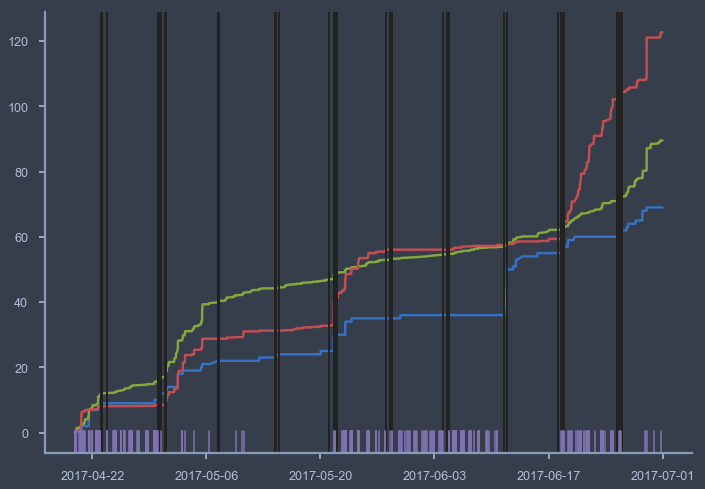

In [28]:
df['hashtag'] = [1 if '#' in x else 0 for x in df['Tweet text']]

plt.plot(df['time'], df['follows_cumsum'])
plt.plot(df['time'], df['retweets_cumsum']/100)
plt.plot(df['time'], df['media views_cumsum']/1000)

for line in df.loc[df['day'] == 6, 'time']:
    plt.axvline(x=line, color='k', linewidth=2)
    
for line in df.loc[df['hashtag'] == 1, 'time']:
    plt.axvline(x=line, color='m', linewidth=1.5, ymax=0.05)
sns.despine()
plt.show()